# 1. Librerías a implementar

In [1]:
# Librería para comando de sistema
import os

# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Librería para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
# Para el reporte de rendimiento con métricas de clasificación
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold

# Librerías para la visualización del árbol de decisión
import matplotlib.pyplot as plt
from sklearn import tree

# 2. Carga de los datos
Se carga el set de datos que se encuentra disponible

In [2]:
# Se cargan los datos
data = pd.read_excel('enfermedad_cardiovascular_data.xlsx', sheet_name='in')

In [3]:
# Cantidad de datos y variables
data.shape

(67976, 13)

In [4]:
# Mostrar los datos
data.head()

,Id,Edad,Género,Altura,Peso,Presion sistólica,Presión diastólica,Colesterol,Glucosa,Fumador,Alcohol,Activo,ECV
0,0,53,M,168,62.0,110,80,Normal,Normal,NO,NO,SI,NO
1,1,58,F,156,85.0,140,90,Muy elevado,Normal,NO,NO,SI,SI
2,2,54,F,165,64.0,130,70,Muy elevado,Normal,NO,NO,NO,SI
3,3,50,M,169,82.0,150,100,Normal,Normal,NO,NO,SI,SI
4,4,50,F,156,56.0,100,60,Normal,Normal,NO,NO,NO,NO


# 3. Descripción de los datos
Ahora es posible hacer una descripción más detallada de los datos disponibles. Se tiene en cuenta que esto es importante para poder determinar problemas de calidad en los datos. Asimismo, proporciona información que será útil en la fase de preparación de los datos.

In [5]:
# Se realiza el perfilamiento de los datos. En este, se genera información de tipo descriptivo para cada una de las variables
# numércias
data.describe()

,Id,Edad,Altura,Peso,Presion sistólica,Presión diastólica
count,67976.000000,67976.000000,67976.000000,67976.000000,67976.000000,67976.000000
mean,49954.764858,55.627913,164.555829,74.392564,126.731611,81.458794
std,28841.186196,7.047183,7.751991,14.032135,16.706251,9.624818
min,0.000000,31.000000,140.000000,48.000000,70.000000,50.000000
25%,24989.750000,50.000000,159.000000,65.000000,120.000000,80.000000
50%,49986.000000,56.000000,165.000000,72.000000,120.000000,80.000000
75%,74842.250000,61.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,68.000000,198.000000,183.000000,240.000000,190.000000


In [6]:
# Categorías que se presentan en la variable categórica "Género" y en qué proporción.
pd.value_counts(data['Género'])

F    44073
M    23849
Name: Género, dtype: int64

In [7]:
# Categorías que se presentan en la variable categórica "Colesterol" y en qué proporción.
pd.value_counts(data['Colesterol'])

Normal         50950
Elevado         9197
Muy elevado     7829
Name: Colesterol, dtype: int64

In [8]:
# Categorías que se presentan en la variable categórica "Glucosa" y en qué proporción.
pd.value_counts(data['Glucosa'])

Normal         57759
Muy elevado     5191
Elevado         5026
Name: Glucosa, dtype: int64

In [9]:
# Categorías que se presentan en la variable categórica "Fumador" y en qué proporción.
pd.value_counts(data['Fumador'])

NO    61959
SI     6017
Name: Fumador, dtype: int64

In [10]:
# Categorías que se presentan en la variable categórica "Alcohol" y en qué proporción.
pd.value_counts(data['Alcohol'])

NO    64314
SI     3662
Name: Alcohol, dtype: int64

In [11]:
# Categorías que se presentan en la variable categórica "Activo" y en qué proporción.
pd.value_counts(data['Activo'])

SI    54604
NO    13372
Name: Activo, dtype: int64

La variable objetivo es **"ECV"**, la cual indica si un paciente ha padecido de una accidente cardiovascular (SI) o no.

In [12]:
# Categorías que se presentan en la variable categórica "ECV" y en qué proporción.
pd.value_counts(data['ECV'])

NO    34190
SI    33786
Name: ECV, dtype: int64

# 4. Limpieza y preparación de los datos

In [13]:
# Es recomendable que todos los pasos de preparación se realicen en otro dataframe
df = data

In [14]:
# Se visualiza los registros nulos a continuación:
df.isna().sum()/len(df)

Id                    0.000000
Edad                  0.000000
Género                0.000794
Altura                0.000000
Peso                  0.000000
Presion sistólica     0.000000
Presión diastólica    0.000000
Colesterol            0.000000
Glucosa               0.000000
Fumador               0.000000
Alcohol               0.000000
Activo                0.000000
ECV                   0.000000
dtype: float64

Teniendo en cuenta lo anterior observamos que hay registro nulos en la variable "Género"

In [15]:
#Se elimina la columna "id"
df = df.drop(['Id'], axis=1)

# Se eliminan del dataframe aquellos registros nulos
df = df.dropna()

#Se explora el dataframe para saber si hay registros duplicados
df = df.drop_duplicates()

In [16]:
df.shape

(64517, 12)

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. De forma particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [17]:
# Transformación de las variables categóricas de entrada
df = pd.get_dummies(df, columns=['Género', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Activo'])

In [18]:
# Para hacer la transformación o codificación de la variable objetivo se usa la función LabelEncoder . Es importante tener en
# cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver será una clasificación
# Primero se debe generar el objeto
codificacion = LabelEncoder()

In [19]:
# se cuentan los registros para "SI" y "NO" de la variable objetivo "ECV" después de la limpieza de datos
pd.value_counts(df['ECV'])

SI    32913
NO    31604
Name: ECV, dtype: int64

In [20]:
# Ahora se ajusta a los datos
df['ECV']=codificacion.fit_transform(df['ECV'])

In [21]:
# Visualización de la clase. Se observa que ahora la categoría "SI" está codificada con un "1" y la clase "NO" con un "0"
df['ECV'].value_counts()

1    32913
0    31604
Name: ECV, dtype: int64

In [22]:
# Se visualiza como quedaron los datos
df.head()

,Edad,Altura,Peso,Presion sistólica,Presión diastólica,ECV,Género_F,Género_M,Colesterol_Elevado,Colesterol_Muy elevado,Colesterol_Normal,Glucosa_Elevado,Glucosa_Muy elevado,Glucosa_Normal,Fumador_NO,Fumador_SI,Alcohol_NO,Alcohol_SI,Activo_NO,Activo_SI
0,53,168,62.0,110,80,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1
1,58,156,85.0,140,90,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1
2,54,165,64.0,130,70,1,1,0,0,1,0,0,0,1,1,0,1,0,1,0
3,50,169,82.0,150,100,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1
4,50,156,56.0,100,60,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0


In [23]:
# Revisión total de registros actualizados
df.shape

(64517, 20)

# 5. Construcción del modelo
Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo.

In [24]:
#S e selecciona la variable objetivo, en este caso "ECV"
Y = df['ECV']
# Del conjunto de datos se elimina la variable "ECV"
X = df.drop(['ECV'], axis=1)

In [25]:
# Se realiza la divisón entrenamiento - test. Se deja el 20% de los datos para el test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 0)

In [26]:
# Creación del objeto de árbol de decisión. Se usa como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
# Entrenamiento del modelo de árbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train, Y_train)

In [28]:
# Se puede determinar la exactitud del modelo sobre los datos del test, para así determinar su rendimiento de generalización
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))

Exactitud: 0.62


# 6. Interpretación del modelo
Se puede determinar cuáles atributos son los más importantes a partir del modelo generado. Es importante recordar que estos algoritmos realizan una selección en cada paso de construcción del árbol con base en la medida de pureza

In [29]:
# Obtener la importancia de las variables. Para esto se puede usar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientra más grande sea este más importante será la variable
# asociada.
importancia = arbol.feature_importances_
importancia

array([0.16043452, 0.21163937, 0.24213481, 0.19081791, 0.05181254,
       0.01434581, 0.01431648, 0.00826666, 0.01545881, 0.01355983,
       0.00857961, 0.00729167, 0.01085538, 0.0073804 , 0.00820477,
       0.005058  , 0.00492198, 0.01273248, 0.01218898])

También se pueden organizar y tabular estos coeficientes para facilitar la interpretación.

In [30]:
importancia_atributo = pd.DataFrame(data={'Atributo': X_train.columns, 'Importancia': importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Peso,0.242135
1,Altura,0.211639
2,Presion sistólica,0.190818
3,Edad,0.160435
4,Presión diastólica,0.051813
5,Colesterol_Muy elevado,0.015459
6,Género_F,0.014346
7,Género_M,0.014316
8,Colesterol_Normal,0.013560
9,Activo_NO,0.012732


Ahora se procede a graficar el modelo. Por propósitos de visualización y requerimiento se limita la profundidad del árbol a 3.

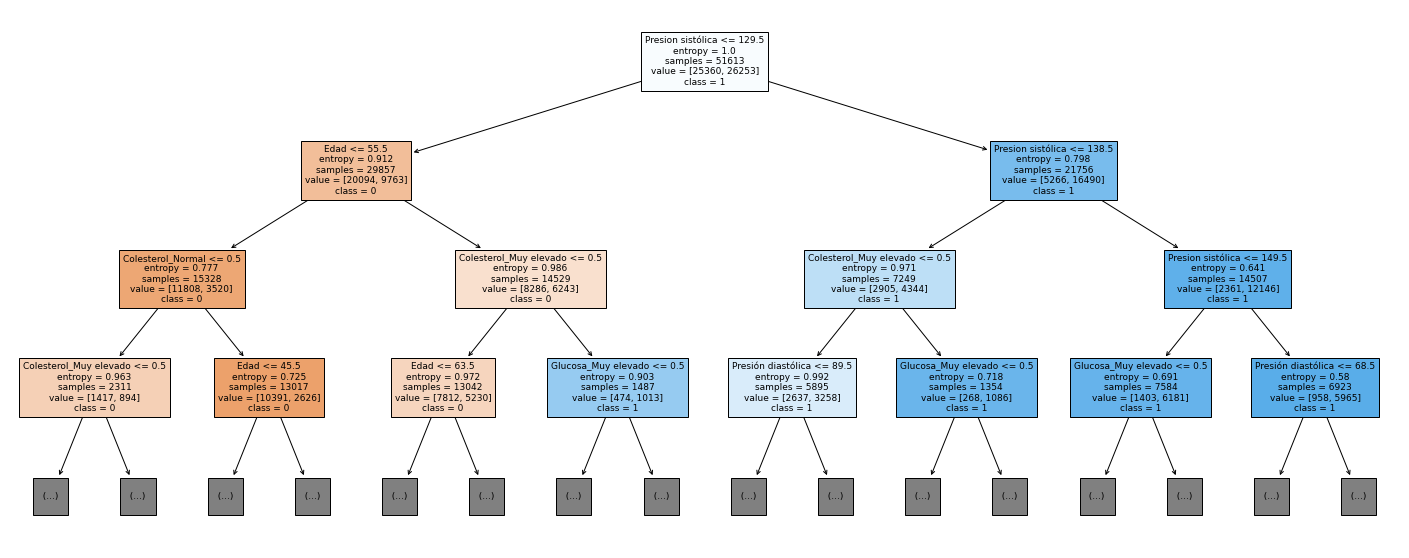

In [31]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [32]:
# Se guarda esta figura como una imagen
fig.savefig("decision_tree.png")

# 7. Búsqueda de hiperparámetros y evaluación.

In [33]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[3785, 2459],
       [2475, 4185]], dtype=int64)

C:\Users\felip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


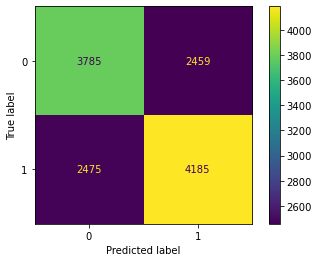

In [34]:
# Se visualiza la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)
plt.show()

De igual manera, es posible generar diferentes métricas de rendimiento, como el recall, la precisión y la puntuación F1.

In [35]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print('Precisión: {}'.format(precision_score(Y_test, y_pred)))
print('Recall: {}'.format(recall_score(Y_test, y_pred)))
print('Puntuación F1: {}'.format(f1_score(Y_test, y_pred)))

Exactitud: 0.62
Precisión: 0.6298916315472607
Recall: 0.6283783783783784
Puntuación F1: 0.6291340950090198


Para tener un panorama más completo podemos generar un reporte.

In [36]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      6244
           1       0.63      0.63      0.63      6660

    accuracy                           0.62     12904
   macro avg       0.62      0.62      0.62     12904
weighted avg       0.62      0.62      0.62     12904



Se puede apreciar que la medida global ofrece un rendimiento de 62% de clasificaciones correctas y que esta se ve reflejada tanto en la clase mayoritaria como minoritaria (ECV=1 y ECV=0). Esto se debe al balance entre clases.

Sin embargo, se podría presentar un desbalance entre clases en un conjunto debido a distintas razones, algunas de ellas relacionadas con la naturaleza del problema, donde este desbalance es el resultado directo de las características de la población que genera los datos o el costo y/o dificultad en la obtención de datos de clase de interés.

En estos escenarios es importante obtener modelos que exhiban un buen rendimiento de predicción sobre la clase minoritaria ya que esta, por lo general, representa el objetivo o target de la tarea de clasificación. Sin embargo, los algoritmos de aprendizaje tradicionales tenderán a producir una solución que sólo tendrá un buen desempeño sobre la clase mayoritaria. Esto se debe a que están diseñados para inducir un modelo de clasificación basado en el error que comete sobre todo el conjunto de entrenamiento, sin tomar en cuenta la representatividad o balance de las clases.

Para resolver este problema se han propuesto diversas estrategias como el remuestreo del conjunto de datos o la construcción de clasificadores que tomen en cuenta el costo de los errores sobre las diferentes clases. En particular, para árboles de decisión, scikit-learn ofrece la posibilidad de indicarle al algoritmo que maneje el desbalance internamente con el parámetro **"class_weight"**. Como no se presenta un desbalance entre clases, a continuación se procede a construir el modelo con búsqueda de hiperparámetros:

# 8. Construcción del modelo con búsqueda de hiperparámetros
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:

* **Criterion:** {"gini", "entropy"}, predeterminado="gini"

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropy".

* **max_depth:** int, predeterminado=None

La profundidad máxima de árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_sample_split muestras.

* **min_sample_split:** int or float, predeterminado=2

El número mínimo de muestras necesarias para dividir un nodo interno.

Para determinar los mejores valores de estos hiperparámetros se realiza la búsqueda a través de la función GridSearchCV.

In [37]:
# Se fija el número de particiones. Se usa K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [38]:
# Se establece el espacio de búsqueda para los hiperparámetros que se desean ajustar.
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[4,6,8,10]}

In [39]:
# Definimos el modelo sin ningún valor de estos hiperparáemtros
arbol = DecisionTreeClassifier(random_state = 0)

In [40]:
# Ahora se usa GridSearchCV sobre el grid definido y con 10 particiones en la validación cruzada
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Se ajusta el modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10]})

In [41]:
# Se puede observar cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [42]:
# Obtener el mejor modelo
modelo_final = mejor_modelo.best_estimator_
# Se prueba ahora este modelo sobre el test
y_pred = modelo_final.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6244
           1       0.76      0.67      0.71      6660

    accuracy                           0.72     12904
   macro avg       0.72      0.72      0.72     12904
weighted avg       0.73      0.72      0.72     12904



In [43]:
# Creación del objeto de árbol de decisión. Se usa como criterio de pureza "gini" y "max_depth=6".
arbol = DecisionTreeClassifier(criterion='gini', max_depth=6,random_state = 0)

In [44]:
# Entrenamiento del modelo de árbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train, Y_train)

In [45]:
# Obtener la importancia de las variables. Para esto se puede usar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientra más grande sea este más importante será la variable
# asociada.
importancia = arbol.feature_importances_
importancia

array([1.21347385e-01, 3.05813558e-03, 1.05419089e-02, 7.67379095e-01,
       6.47419516e-03, 4.43290120e-04, 0.00000000e+00, 3.68269884e-03,
       7.00597026e-02, 0.00000000e+00, 1.85252504e-04, 7.51487215e-03,
       0.00000000e+00, 2.86378648e-03, 2.41265839e-03, 0.00000000e+00,
       0.00000000e+00, 2.82292644e-03, 1.21409243e-03])

In [46]:
importancia_atributo = pd.DataFrame(data={'Atributo': X_train.columns, 'Importancia': importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Presion sistólica,0.767379
1,Edad,0.121347
2,Colesterol_Muy elevado,0.070060
3,Peso,0.010542
4,Glucosa_Muy elevado,0.007515
5,Presión diastólica,0.006474
6,Colesterol_Elevado,0.003683
7,Altura,0.003058
8,Fumador_NO,0.002864
9,Activo_NO,0.002823


Ahora se procede a graficar el modelo. Por propósitos de visualización y requerimiento se limita la profundidad del árbol a 3.

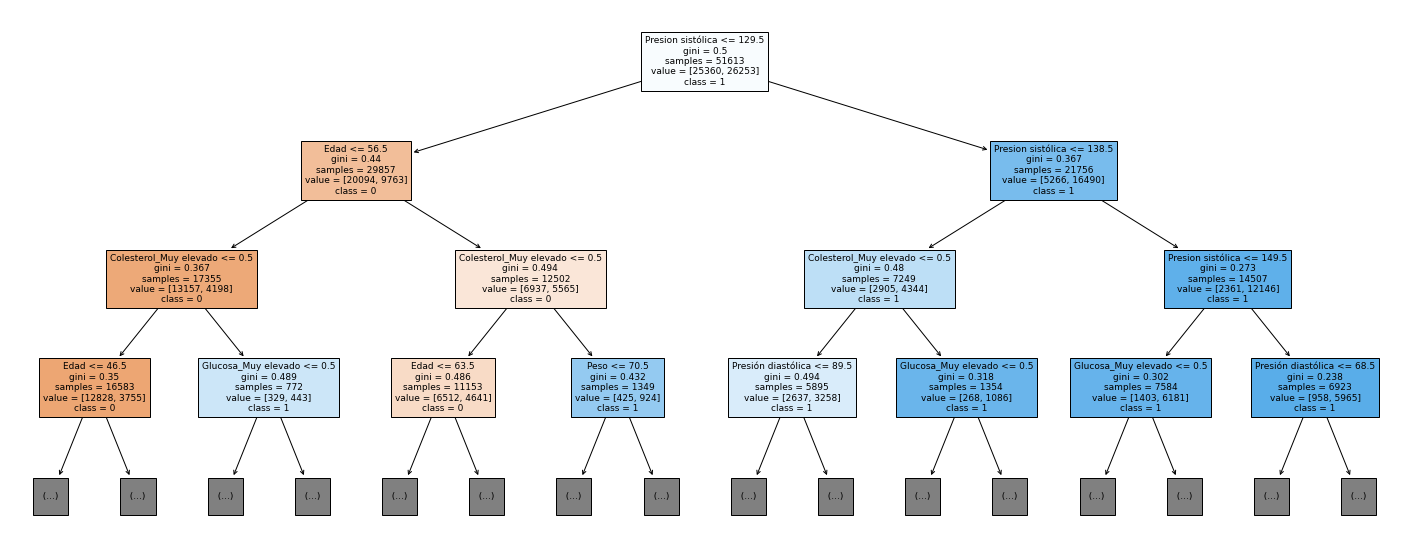

In [47]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [48]:
# Se guarda esta figura como una imagen
fig.savefig("decision_tree_hyperparameters.png")

In [49]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[4862, 1382],
       [2215, 4445]], dtype=int64)

C:\Users\felip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


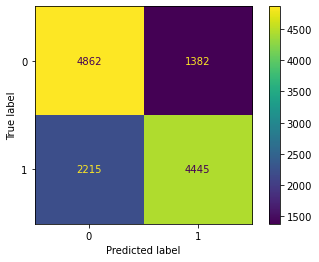

In [50]:
# Se visualiza la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)
plt.show()

De igual manera, es posible generar diferentes métricas de rendimiento, como el recall, la precisión y la puntuación F1.

In [51]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print('Precisión: {}'.format(precision_score(Y_test, y_pred)))
print('Recall: {}'.format(recall_score(Y_test, y_pred)))
print('Puntuación F1: {}'.format(f1_score(Y_test, y_pred)))

Exactitud: 0.72
Precisión: 0.7628282134889308
Recall: 0.6674174174174174
Puntuación F1: 0.7119404180347562


# 9. Predicciones y probabilidad
Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como una clase particular.

In [52]:
# Por ejemplo, tomemos un dato del conjunto test y apliquemos el método "predict_proba".
y_pred_test = modelo_final.predict_proba(X_test.iloc[[20]])

In [53]:
print(y_pred_test)

[[0.60611735 0.39388265]]


In [54]:
# Para saber el orden de las clases se puede usar el atributo "classes_" del modelo:
modelo_final.classes_

array([0, 1])